In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score as ROC 
from sklearn.metrics import recall_score as Recall 
from sklearn.metrics import precision_score as Precision
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as TTS 

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression as LogiR
from sklearn.linear_model import LinearRegression as LR

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as GBC
from sklearn.ensemble import GradientBoostingRegressor as GBR


import joblib
from collections import Counter

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

In [4]:
def draw_confusion(y_test,pred):
    print("Confusion Matrix:")
    c_matrix = confusion_matrix(y_test,pred)
    ax = sns.heatmap(c_matrix, annot=True, fmt='d', cbar=False, cmap='Blues')
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Actual")
    ax.set_title('Confusion Matrix')
    plt.show()

In [6]:
def draw_ROC(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [11]:
def train(df, model_filename,reg=False):
    X = df.drop('fraud', axis=1)
    y = df['fraud']
    X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.4, random_state=0)
    
    if reg:
        model = GBR().fit(X_train, y_train)
        prob = model.predict(X_test).tolist()
        prob_ = np.array(prob)
        pred = (prob_ >= 0.5).astype(int)
        draw_confusion(y_test,pred)
        y_scores = model.predict_proba(X_test)[:, 1]
        draw_ROC(y_test, y_scores)
    else:
        model = GBC().fit(X_train, y_train)
        pred = model.predict(X_test).tolist()
        draw_confusion(y_test,pred)
        draw_ROC(y_test, pred)
    joblib.dump(model, model_filename)
    print("ROC: ", ROC(y_test, pred))
    print("Classification Report:")
    print(classification_report(y_test, pred))


Confusion Matrix:


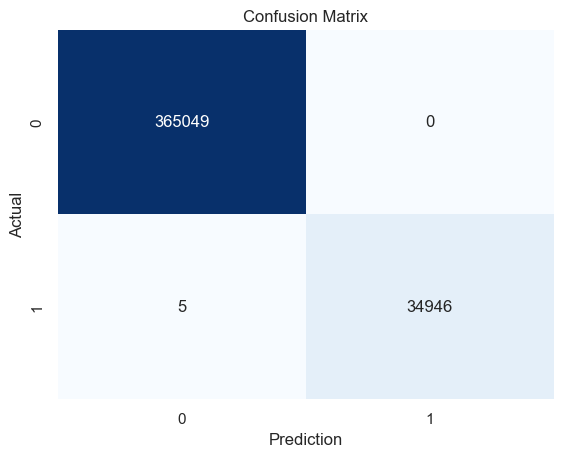

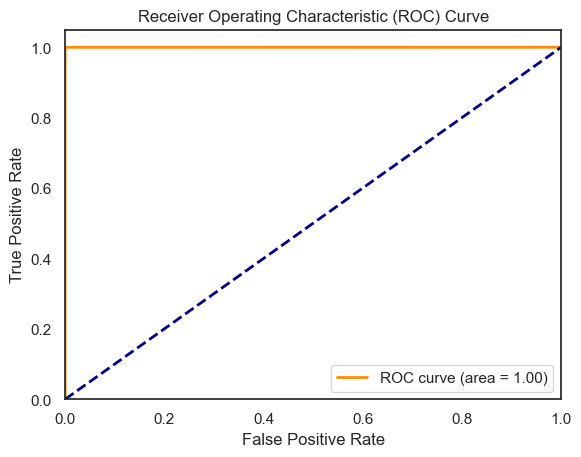

ROC:  0.9999284712883751
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365049
         1.0       1.00      1.00      1.00     34951

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [12]:
df = pd.read_csv('card_transdata.csv')
train(df, "card_transdata_reg")